### What is a regression problem

* Predicting a number (House price)
* Object detection (A car in an image)

### Architecture of a regresiion model

* Input layer shape
* Hidden layer(s)
* Neurons per hidden layer
* Output layer shape
* Hidden activation
* Output activation
* Loss function
* Optimizer

In [63]:
import tensorflow as tf

## Creating some data to view and fit

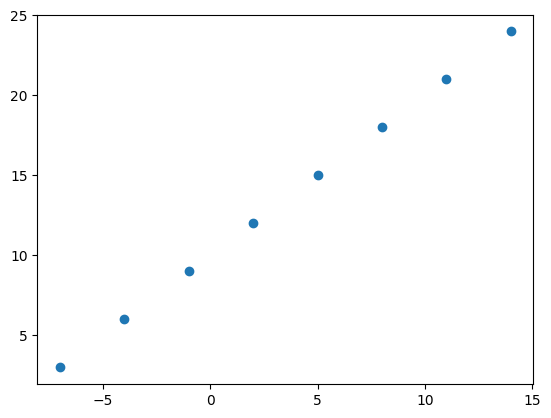

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Crate labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, Y);

### Input and output shapes

In [65]:
#  Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [66]:
input_shape = X.shape
output_shape = Y.shape

input_shape, output_shape

((8,), (8,))

In [67]:
# Turn our NumPy arrays into tensors

X = tf.constant(X)
Y = tf.constant(Y)

X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [68]:
input_shape = X[0].shape
output_shape = Y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow

1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define the loss funtion (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns between X & Y (features and labels)
4. Evaluate the model on test data.

In [69]:
 # Set random seed
tf.random.set_seed(42)

# 1. Creat a model using the Sequencial API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # Mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochasitc gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 372ms/step - loss: 10.6402 - mae: 10.6402
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 10.5077 - mae: 10.5077
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 10.3752 - mae: 10.3752
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 10.2427 - mae: 10.2427
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 10.1102 - mae: 10.1102


In [70]:
# Check out X and Y
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [71]:
#Try and make a predict using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 70ms/step


array([[16.915327]], dtype=float32)

### Improving our model

We can improve our mdoel, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of the hidden units within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** or on more data.

In [72]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 335ms/step - loss: 17.2074 - mae: 17.2074
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 16.9261 - mae: 16.9261
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 16.6449 - mae: 16.6449
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 16.3636 - mae: 16.3636
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 16.0824 - mae: 16.0824
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 15.8011 - mae: 15.8011
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 15.5199 - mae: 15.5199
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 15.2386 - mae: 15.2386
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 14.9574 - mae: 14.9574
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 14.7503 - mae: 14.7503
Epoch 11/100
1/1 [==============================] -

In [73]:
# Data
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [74]:
model.predict([17.0])

1/1 [==============================] - 0s 100ms/step


array([[29.601585]], dtype=float32)

In [75]:
# Let's see if we can make another to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=1), Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 756ms/step - loss: 14.1719 - mae: 14.1719
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 13.4979 - mae: 13.4979
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 12.8315 - mae: 12.8315
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 12.1694 - mae: 12.1694
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 11.5076 - mae: 11.5076
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 10.8409 - mae: 10.8409
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 10.1655 - mae: 10.1655
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 9.4781 - mae: 9.4781
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 8.7758 - mae: 8.7758
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 8.0557 - mae: 8.0557
Epoch 11/100
1/1 [==============================] - 0s 10

In [76]:
model.predict([17.0])

1/1 [==============================] - 0s 73ms/step


array([[27.374884]], dtype=float32)

### Evaluating a model

In practice, a typical workflow you'll go through when building a neural networks is:

1. Build a model
2. Fit the model
3. Evaluate the model
4. Repeate the process

When it comes to evaluation:
 * Visualize, visualize, visualize

 **Vizualize:**
  * The data - what daata are we working with? What does it look like?
  * The model itself - what does our model look like?
  * The training of a model - how does a model perform while it learns?
  * The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)

In [77]:
# Make a bigger dataset

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [78]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

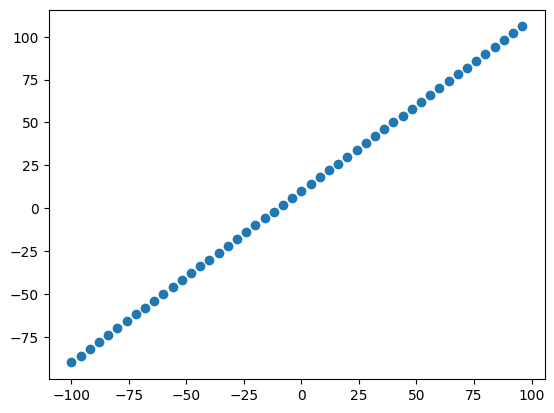

In [79]:
# visualize the data

plt.scatter(X, y)

### The three sets

 * Train set -> 70% - 80%
 * Validation set -> 10% - 15%
 * Test set -> 10% - 15%

In [80]:
# Check the length of data set
len(X)

50

In [81]:
# Split the data into train and test sets

X_train = X[:40]
X_test = X[40:]

y_train = y[:40]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Visualize the splitted data

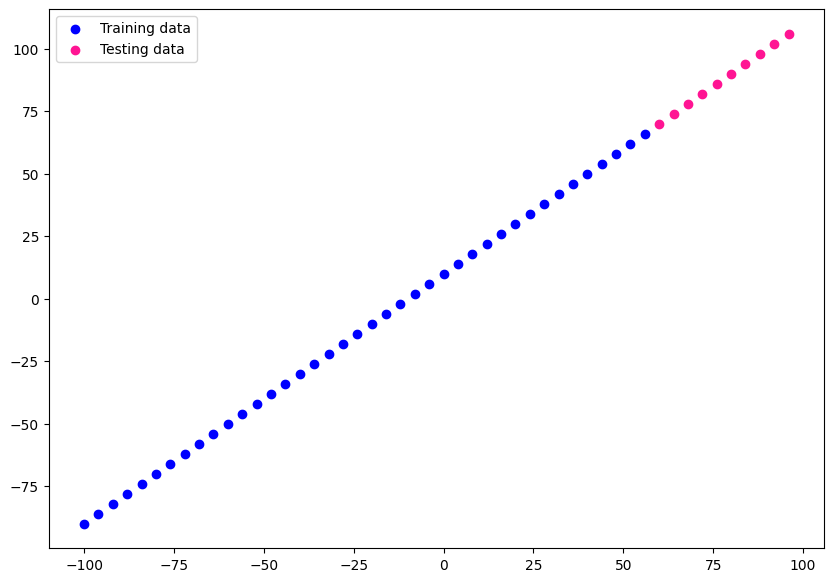

In [82]:
plt.figure(figsize=(10, 7))

# PLot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')

# Plot test data in purple
plt.scatter(X_test, y_test, c='deeppink', label='Testing data')

# Show a legend
plt.legend();

In [83]:
# Let's have a look at how to build a neural network for our data

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# Fit the model
model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 38.9646 - mae: 38.9646
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 10.9648 - mae: 10.9648
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 11.7105 - mae: 11.7105
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 9.3341 - mae: 9.3341
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 10.2065 - mae: 10.2065
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.4657 - mae: 9.4657
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.6011 - mae: 8.6011
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0543 - mae: 9.0543
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 18.8137 - mae: 18.8137
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1544 - mae: 10.1544
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - l

### Visualize the model

In [84]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [85]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer

tf.random.set_seed(42)

# Create a model
model =tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(1, name='output_layer')
], name='model_1')

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

In [86]:
# Fit the model

model.fit(X_train, y_train, epochs=100, verbose=0)

In [87]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
 output_layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - there parameters aren't updated during training (for imported models and transfer learning)

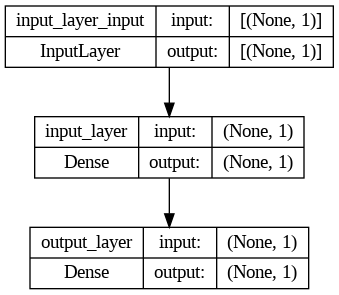

In [88]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

### Visualizing our model predictions

In [89]:
# Make some predicitions

y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 52ms/step


array([[ 76.49202 ],
       [ 81.47486 ],
       [ 86.4577  ],
       [ 91.44054 ],
       [ 96.42338 ],
       [101.40621 ],
       [106.389046],
       [111.37188 ],
       [116.35472 ],
       [121.337555]], dtype=float32)

In [90]:
# Check test values
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  """
  Plotss training data, test data and compares predictions to grounf truth labels.
  """

  plt.figure(figsize=(10, 7))

  # Plot training data
  plt.scatter(train_data, train_labels, c='darkviolet', label='Training data')

  # Plot training data
  plt.scatter(test_data, test_labels, c='deeppink', label='Testing data')

  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c='r', label='Predictions')

  plt.legend();

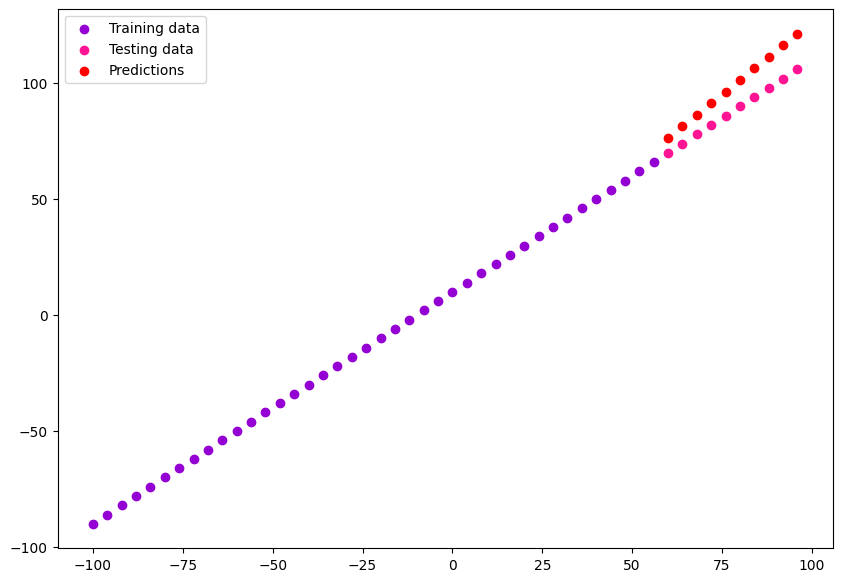

In [91]:
plot_predictions()

### Evaluating our model's predictions with regressino evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:

* MAE - Mean absolute error
* MSE - Mean square error -> When larger errors are more significant than smaller errors.
* Huber - Combination of MSE and MAE. Less sensitive to outliers than MSE.

In [92]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 121ms/step - loss: 10.9148 - mae: 10.9148


[10.914791107177734, 10.914791107177734]

In [93]:
# Calculate the MAE

tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=10.914791>

In [94]:
# Calculate the MSE

tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=127.101906>

In [95]:
# Make functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                                y_pred=tf.squeeze(y_pred))


In [96]:
mae(y_test, y_pred), mse(y_test, y_pred)

(<tf.Tensor: shape=(), dtype=float32, numpy=10.914791>,
 <tf.Tensor: shape=(), dtype=float32, numpy=127.101906>)

### Running experiments to improve our model

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model).
3. Train for longer

3 modelling experiments:

1. 'model_1' - 1 layer, trained for 100 epochs.
2. 'model_2' - 2 layers, trained for 100 epochs
3. 'model_3' - 2 layers, trained for 500 epochs

In [97]:
X_train,  y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [98]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 27.2057 - mae: 27.2057
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 9.1729 - mae: 9.1729
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 7.9879 - mae: 7.9879
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 7.9854 - mae: 7.9854
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1859 - mae: 10.1859
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.4467 - mae: 9.4467
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 8.5844 - mae: 8.5844
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0474 - mae: 9.0474
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 18.7827 - mae: 18.7827
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1330 - mae: 10.1330
Epoch 11/100
2/2 [==============================] - 0s 8ms/step - loss

1/1 [==============================] - 0s 90ms/step


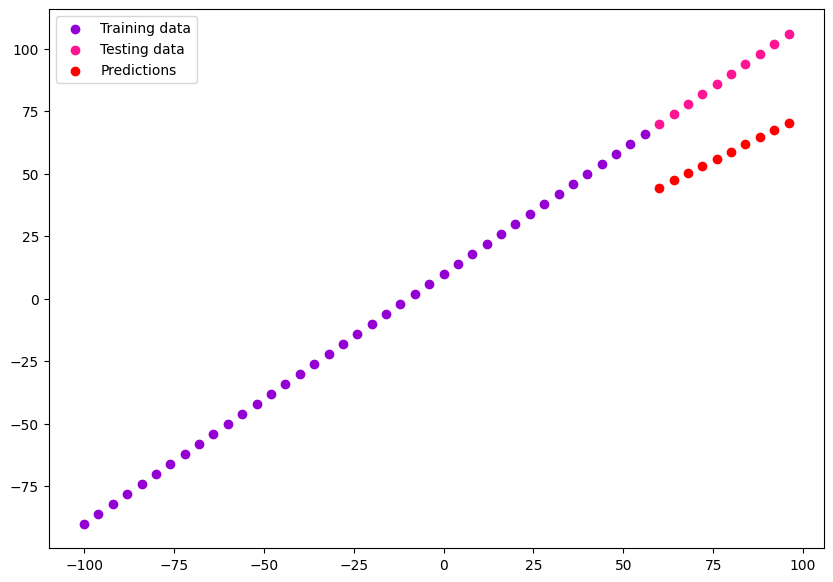

In [99]:
# Make and plot predictions for model_1

y_preds_1 = model_1.predict(X_test)

plot_predictions(predictions=y_preds_1)

In [100]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.558329>,
 <tf.Tensor: shape=(), dtype=float32, numpy=944.1793>)

In [101]:
tf.random.set_seed(42)

# Create model_2

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse'])

model_2.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 13ms/step - loss: 32.6676 - mse: 1475.9603
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 27.5537 - mse: 1001.1365
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 33.2623 - mse: 1638.1162
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 24.7930 - mse: 890.8535
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 14.6947 - mse: 268.5987
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 11.7033 - mse: 160.1582
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 11.0513 - mse: 147.8604
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 11.0552 - mse: 153.6426
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 39.9403 - mse: 2506.1641
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 27.4010 - mse: 1056.8774
Epoch 11/100
2/2 [=========================

1/1 [==============================] - 0s 67ms/step


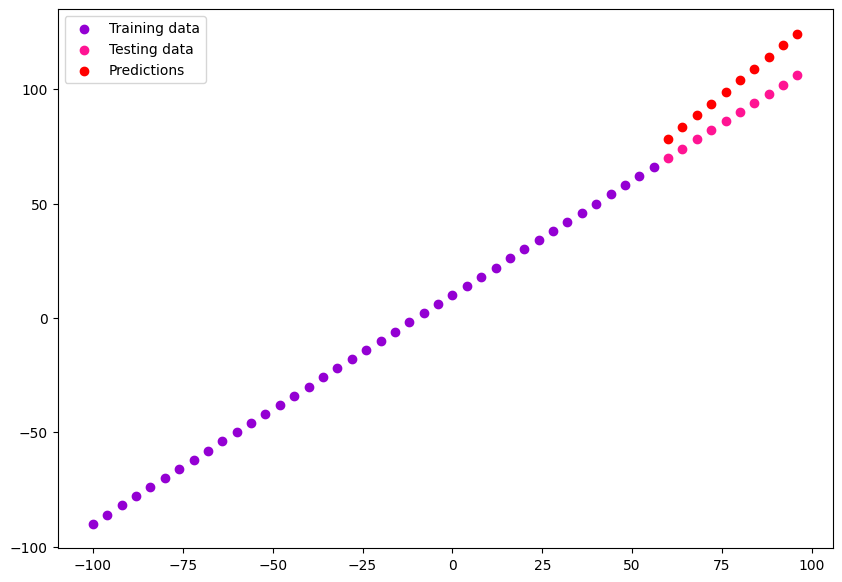

In [102]:
# make and plot preds

y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [103]:
# Calculate evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=13.230624>,
 <tf.Tensor: shape=(), dtype=float32, numpy=185.06845>)

In [104]:
tf.random.set_seed(42)

# Create model_3

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse'])

model_3.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=500, verbose=0)

1/1 [==============================] - 0s 52ms/step


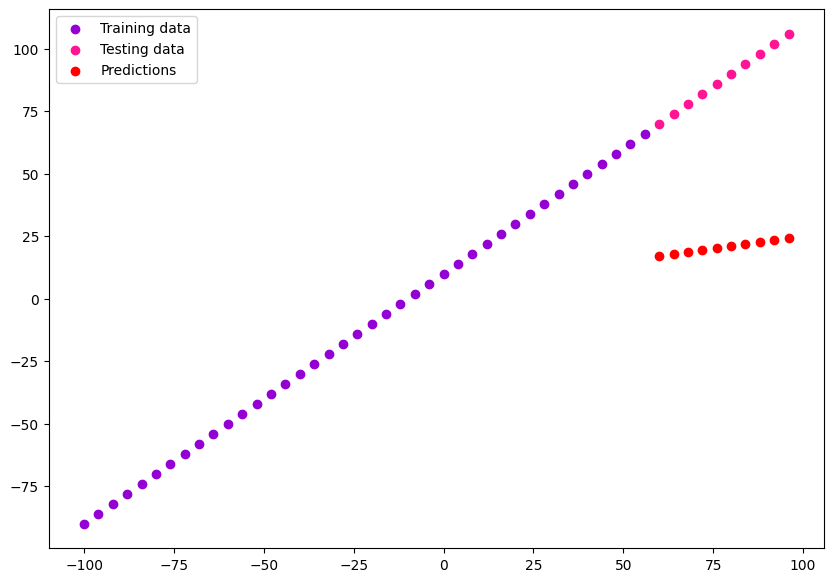

In [105]:
# Make predictions with model_3

y_preds_3 = model_3.predict(X_test)

plot_predictions(predictions=y_preds_3)

In [106]:
# Calculate model_3 evaluation metrics

mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.31534>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4614.251>)

### Comparing the results of our experiments

In [107]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results=[['model_1', mae_1.numpy(), mse_1.numpy()],
               ['model_2', mae_2.numpy(), mse_2.numpy()],
               ['model_3', mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=['model', 'mae', 'mse'])
all_results

,model,mae,mse
0,model_1,30.558329,944.179321
1,model_2,13.230624,185.068451
2,model_3,67.315338,4614.250977


### Tracking your experiments

One really good habit in machine learning modelling is to track results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us:

* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* Weights & Biases - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard)

### Saving our Model

Saving our models allows us to use them outside google colab

There are 2 main formats we can save our model:
1. The SavedModel format
2. The HDF5 form

In [108]:
# Save model
model_2.save('best_model_2_SM')

In [109]:
# Save model HDF5
model_2.save('best_model_2.h5')

### Loading a saved model

In [110]:
new_model_2 = tf.keras.models.load_model("/content/best_model_2_SM")

In [111]:
new_model_2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 10)                20        
                                                                 
 dense_22 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [112]:
model_2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 10)                20        
                                                                 
 dense_22 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [113]:
new_model_preds = new_model_2.predict(X_test)
model_2_preds = model_2.predict(X_test)

new_model_2, model_2_preds

1/1 [==============================] - 0s 34ms/step


(<keras.engine.sequential.Sequential at 0x788564cf3880>,
 array([[ 78.27158 ],
        [ 83.3736  ],
        [ 88.4756  ],
        [ 93.57761 ],
        [ 98.67962 ],
        [103.781624],
        [108.883644],
        [113.98565 ],
        [119.08766 ],
        [124.18967 ]], dtype=float32))

In [114]:
new_model_preds == model_2_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

### A larger example

In [4]:
# Import libraries

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
# import insurance dataset

data = pd.read_csv('/insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
# One-hot encode

insurance_one_hot = pd.get_dummies(data)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [7]:
# Create X & Y
X = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot['charges']

X, y

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0      19  27.900         0           1         0          0           1   
 1      18  33.770         1           0         1          1           0   
 2      28  33.000         3           0         1          1           0   
 3      33  22.705         0           0         1          1           0   
 4      32  28.880         0           0         1          1           0   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1333   50  30.970         3           0         1          1           0   
 1334   18  31.920         0           1         0          1           0   
 1335   18  36.850         0           1         0          1           0   
 1336   21  25.800         0           1         0          1           0   
 1337   61  29.070         0           1         0          0           1   
 
       region_northeast  region_northwest  region_southeast  region_southw

In [8]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Build a model
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 5s 5ms/step - loss: 8727.2539 - mae: 8727.2539
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 7858.3525 - mae: 7858.3525
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 7548.9482 - mae: 7548.9482
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 7688.6089 - mae: 7688.6089
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 7687.4922 - mae: 7687.4922
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 7539.7466 - mae: 7539.7466
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 7569.5908 - mae: 7569.5908
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 7718.9658 - mae: 7718.9658
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 7507.7842 - mae: 7507.7842
Epoch 10/100
34/34 [==============================] - 0s 5ms/step - loss: 7686.0864 - mae: 7686.0864

In [10]:
# Check the results of the insurance model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8473.5107 - mae: 8473.5107


[8473.5107421875, 8473.5107421875]

**Improve our model**

In [13]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 3s 7ms/step - loss: 13279.4648 - mae: 13279.4648
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 13105.3125 - mae: 13105.3125
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 12754.0908 - mae: 12754.0908
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 12078.6729 - mae: 12078.6729
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 10951.5117 - mae: 10951.5117
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 9506.2939 - mae: 9506.2939
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 8176.5439 - mae: 8176.5439
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 7543.6470 - mae: 7543.6470
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7439.4199 - mae: 7439.4199
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7418.8555 - mae:

In [15]:
# Evaluation
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 4885.2285 - mae: 4885.2285


[4885.228515625, 4885.228515625]

In [17]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

history = insurance_model_3.fit(X_train, y_train ,epochs = 200)

Epoch 1/200
34/34 [==============================] - 1s 4ms/step - loss: 13288.8320 - mae: 13288.8320
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13103.6914 - mae: 13103.6914
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 12737.0449 - mae: 12737.0449
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 12036.1377 - mae: 12036.1377
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 10886.6143 - mae: 10886.6143
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 9443.1191 - mae: 9443.1191
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 8141.3325 - mae: 8141.3325
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7527.9805 - mae: 7527.9805
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7430.2871 - mae: 7430.2871
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 7410.2031 - mae:

In [19]:
# Evaluate
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3496.2251 - mae: 3496.2251


[3496.22509765625, 3496.22509765625]

Text(0.5, 0, 'epochs')

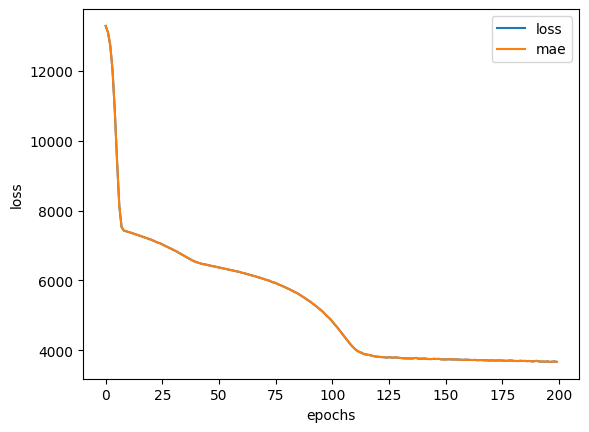

In [20]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

You should train as long the EarlyStopping function is trigged.

## Prepocessing data (normalization and standardization)

<Axes: ylabel='Frequency'>

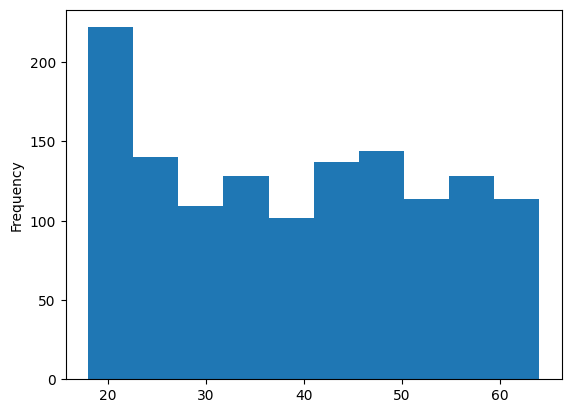

In [22]:
X['age'].plot(kind='hist')

<Axes: ylabel='Frequency'>

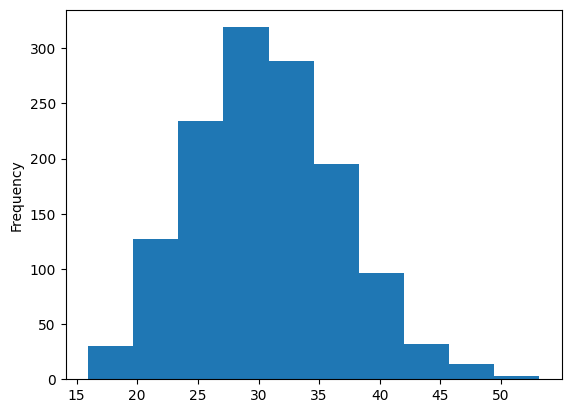

In [23]:
X['bmi'].plot(kind='hist')

Normalisation (Scale): converting all values to values between 0 and 1

Standardization: Removes the mean and divides each value by the standard deviation

Neural networks prefer normalization, but you can try both to see what works the better.


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [25]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

# Create x & y
X = data.drop('charges', axis=1)
y = data['charges']

# Train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer only on training data
ct.fit(X_train)

# Transform
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [28]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [30]:
# set the seed
tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

insurance_model_4.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 13344.0273 - mae: 13344.0273
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13335.2969 - mae: 13335.2969
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 13313.5059 - mae: 13313.5059
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 13268.2920 - mae: 13268.2920
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 13189.0791 - mae: 13189.0791
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 13064.8584 - mae: 13064.8584
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 12884.8955 - mae: 12884.8955
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 12638.8643 - mae: 12638.8643
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 12316.6221 - mae: 12316.6221
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 11914.40

In [31]:
# Evaluate
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3171.1921 - mae: 3171.1921


[3171.192138671875, 3171.192138671875]